In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
#Reading Data from adult.data.csv

adult_data = pd.read_csv('adult.data.csv',skipinitialspace=True)
# skipinitialspace is True to remove extra white space from input data

In [44]:
# checking the head of the data
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [46]:
#1. Male and Female Count : 

adult_data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [47]:
#2. Average Age of Women :
np.mean(adult_data[adult_data['sex']=='Female']['age'])

36.85823043357163

In [49]:
#3. Percentage of German Citizen :

number_of_germans = adult_data[adult_data['native-country']=='Germany'].shape[0] # shape[0] gives the number of rows
total_citizen = adult_data.shape[0]
print ("Percentage of German : ",number_of_germans*100/total_citizen)

Percentage of German :  0.42074874850281013


In [51]:
#4. Mean and Std of age who earns more than 50k

salary_more_than_50k_age = adult_data[adult_data['salary']=='>50K']['age']
print (">50K mean : ",np.mean(salary_more_than_50k_age))
print (">50K std : ",np.std(salary_more_than_50k_age))

# Mean and Std of age who earns less than or equal to 50k

salary_less_than_50k_age = adult_data[adult_data['salary']=='<=50K']['age']
print ("<=50K mean : ",np.mean(salary_less_than_50k_age))
print ("<=50K std : ",np.std(salary_less_than_50k_age))

>50K mean :  44.24984058155847
>50K std :  10.518356927661575
<=50K mean :  36.78373786407767
<=50K std :  14.019804910115214


In [53]:
#5. Is it true that people who earn more than 50K have at least high school education?

salary_more_than_50k = adult_data[adult_data['salary']=='>50K']
salary_more_than_50k['education'].value_counts()

# Ans - No, there are people with lower qualification who earn more than 50K

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

Age Race Statistics
                age
count  32561.000000
mean      38.581647
std       13.640433
min       17.000000
25%       28.000000
50%       37.000000
75%       48.000000
max       90.000000


Age Gender Statistics
                age
count  32561.000000
mean      38.581647
std       13.640433
min       17.000000
25%       28.000000
50%       37.000000
75%       48.000000
max       90.000000


<AxesSubplot:xlabel='sex', ylabel='age'>

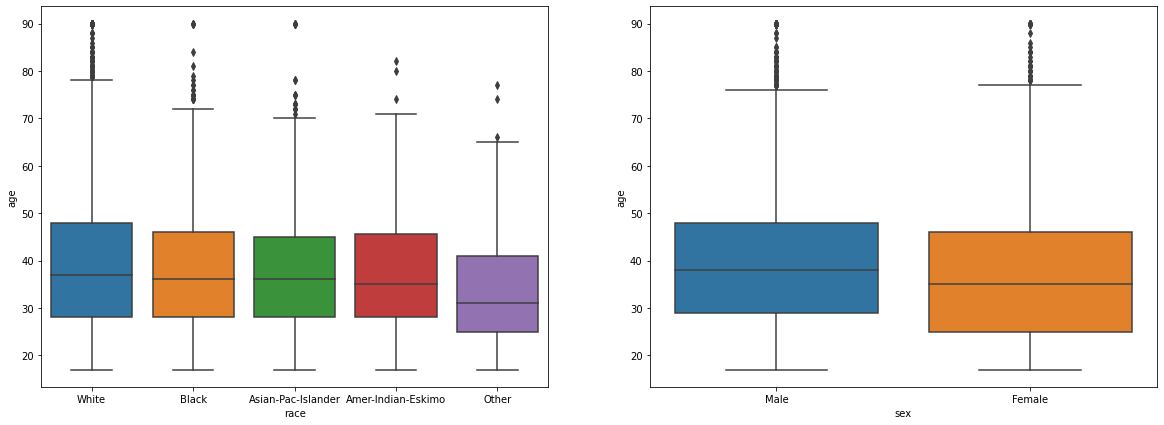

In [76]:
#6.  Display age statistics for each race  (BoxPlot & Describe)

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.boxplot(y='age',x='race',data=adult_data)
age_race = adult_data[['age','race']]
print("Age Race Statistics")
print(age_race.describe())
print("\n")

# Display age statistics for each gender (BoxPlot & Describe)
age_sex = adult_data[['age','sex']]
print("Age Gender Statistics")
print(age_sex.describe())
plt.subplot(1,2,2)
sns.boxplot(x='sex', y='age', data=adult_data)

In [79]:
# 7. maximum number of hours a person works per week

max_hours_per_week = adult_data['hours-per-week'].max()
print("max work hours per week : ",max_hours_per_week)

# dataframe that stores the rows where each person works for max hours per week
working_max_hours = adult_data[adult_data['hours-per-week']==max_hours_per_week]
# number of people working for max hours per week
no_of_adults_working_for_max_hours = working_max_hours.shape[0]
print("number of people working for max hours per week ",no_of_adults_working_for_max_hours)

# dataframe that stores those rows where each person earns more than 50K and also works for max hours per week
no_of_adults_earning_more = working_max_hours[working_max_hours['salary']=='>50K'].shape[0]
print("percentage of people working for max hours and also earning more than 50K is ",
      (no_of_adults_earning_more*100)/no_of_adults_working_for_max_hours)


max work hours per week :  99
number of people working for max hours per week  85
percentage of people working for max hours and also earning more than 50K is  29.41176470588235


In [89]:
#8. avg salary calculation for those who earns little and also lot.

#  for little salary
print("for little salary people ")
sal_little = adult_data[adult_data['salary']=='<=50K']
print(sal_little.groupby(by='native-country')['hours-per-week'].mean())


# for lot salary
print("\n\nfor more salary people ")
sal_more = adult_data[adult_data['salary']=='>50K']
print(sal_more.groupby(by='native-country')['hours-per-week'].mean())

# people of japan who earns more than 50K
japan_more = sal_more.groupby(by='native-country')['hours-per-week'].mean()
print("\n\navg time of work in japan of people with more salary",japan_more['Japan'])

#people of japan who earns less than or equal to 50K.
japan_less = sal_little.groupby(by='native-country')['hours-per-week'].mean()
print("\n\navg time of work in japan ",japan_less['Japan'])


for little salary people 
native-country
?                             40.164760
Cambodia                      41.416667
Canada                        37.914634
China                         37.381818
Columbia                      38.684211
Cuba                          37.985714
Dominican-Republic            42.338235
Ecuador                       38.041667
El-Salvador                   36.030928
England                       40.483333
France                        41.058824
Germany                       39.139785
Greece                        41.809524
Guatemala                     39.360656
Haiti                         36.325000
Holand-Netherlands            40.000000
Honduras                      34.333333
Hong                          39.142857
Hungary                       31.300000
India                         38.233333
Iran                          41.440000
Ireland                       40.947368
Italy                         39.625000
Jamaica                       38.239437